In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv("HousingData.csv")

#Printing first 5 records of the dataset
print(data.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


In [2]:
# this below show method will show the dimention of the dataset
data.shape

(506, 14)

In [3]:
X = data[['RM','AGE','TAX','LSTAT']]
Y = data['MEDV']

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [5]:
RM_encoder=LabelEncoder()
AGE_encoder=LabelEncoder()
TAX_encoder=LabelEncoder()
LSTAT_encoder=LabelEncoder()

In [6]:
import warnings
warnings.filterwarnings('ignore')

RM_encoder.fit(pd.DataFrame(X['RM']))
X['RM']=RM_encoder.transform(X['RM'])

AGE_encoder.fit(pd.DataFrame(X['AGE']))
X['AGE']=AGE_encoder.transform(X['AGE'])

TAX_encoder.fit(pd.DataFrame(X['TAX']))
X['TAX']=TAX_encoder.transform(X['TAX'])

LSTAT_encoder.fit(pd.DataFrame(X['LSTAT']))
X['LSTAT']=LSTAT_encoder.transform(X['LSTAT'])


In [7]:
X.head()

,RM,AGE,TAX,LSTAT
0,320,166,34,50
1,279,219,11,153
2,400,153,11,26
3,383,106,5,6
4,395,133,5,438


<Axes: >

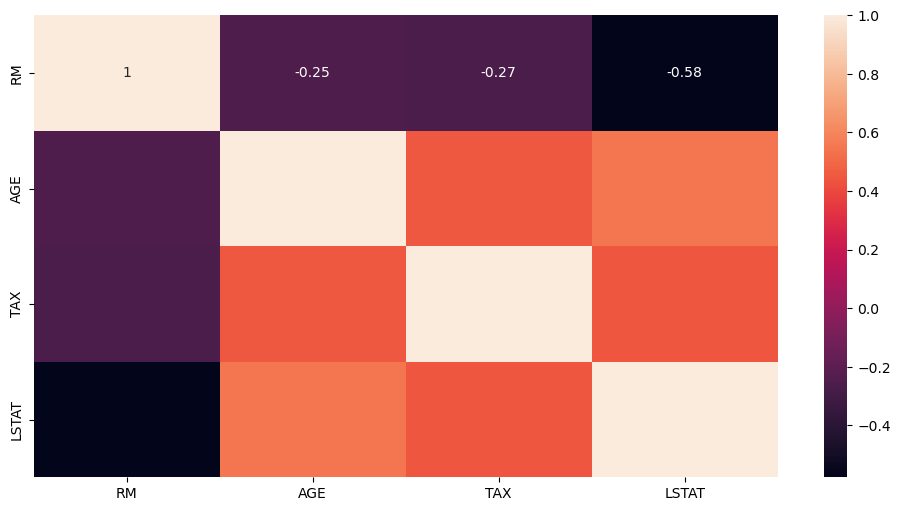

In [8]:
plt.figure(figsize=(12,6))
sns.heatmap(X.corr(),annot=True)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [11]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((404, 4), (102, 4), (404,), (102,))

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [14]:
y_predict=model.predict(X_test)

In [15]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [16]:
score=r2_score(Y_test,y_predict)
mae=mean_absolute_error(Y_test,y_predict)
mse=mean_squared_error(Y_test,y_predict)
print("R2 score is ",score)
print("Mean absolute error is ",mae)
print("Mean squared error ",mse)

R2 score is  0.6027959260888344
Mean absolute error is  3.80743729570692
Mean squared error  29.128477426598312
